In [1]:
from model import mix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
st = pd.read_hdf('../data/jvs_models/standard_population.h5', key='sample', mode='r')
ro = pd.read_hdf('../data/jvs_models/rocrit_population.h5', key='sample', mode='r')

In [3]:
mix = mix()

## Test 1:
Let's run on solar data. This should not inform the choice of rotational model strongly, as the Sun is not at the proposed critical Rossby number.

In [4]:
star1 = {'ID': 'star1', 'mass': [1.0, 0.01], 'teff': [5777.0, 50.0], 
         'logage': [np.log(4.5), .02], 'logprot': [np.log(25.5), 0.01]}

FileNotFoundError: [Errno 2] No such file or directory: '/rds/projects/2018/daviesgr-asteroseismic-computation/ojh251/malatium/models_upgrade/star1_corner.png'

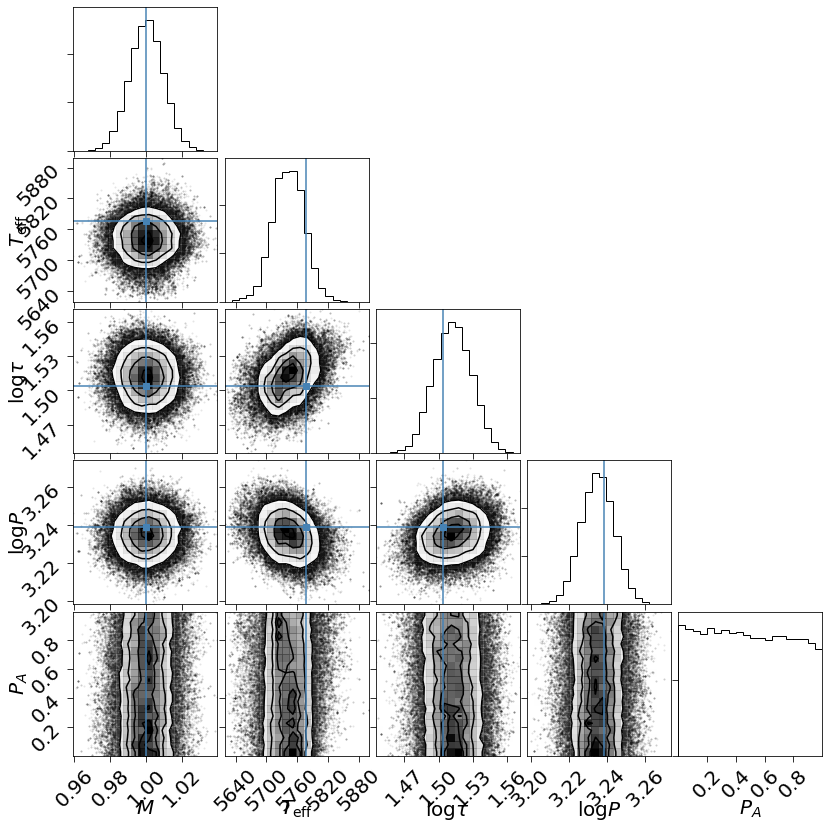

In [5]:
%%time
mix.run_one_star(star1)

## Test 2:

Now let's run on the sun again, but say that it is 1 Gyr older than it really is. If the solar rotation stopped slowing in the next Gyr, as these fake data would suggest, this would produce a strong posterior in favour of weakened magnetic braking ($P_A \rightarrow 0$).

In [6]:
star2 = {'ID': 'star2', 'mass': [1.0, 0.01], 'teff': [5777.0, 50.0], 
         'logage': [np.log(5.5), 0.02], 'logprot': [np.log(25.5), 0.01]}

FileNotFoundError: [Errno 2] No such file or directory: '/rds/projects/2018/daviesgr-asteroseismic-computation/ojh251/malatium/models_upgrade/star2_corner.png'

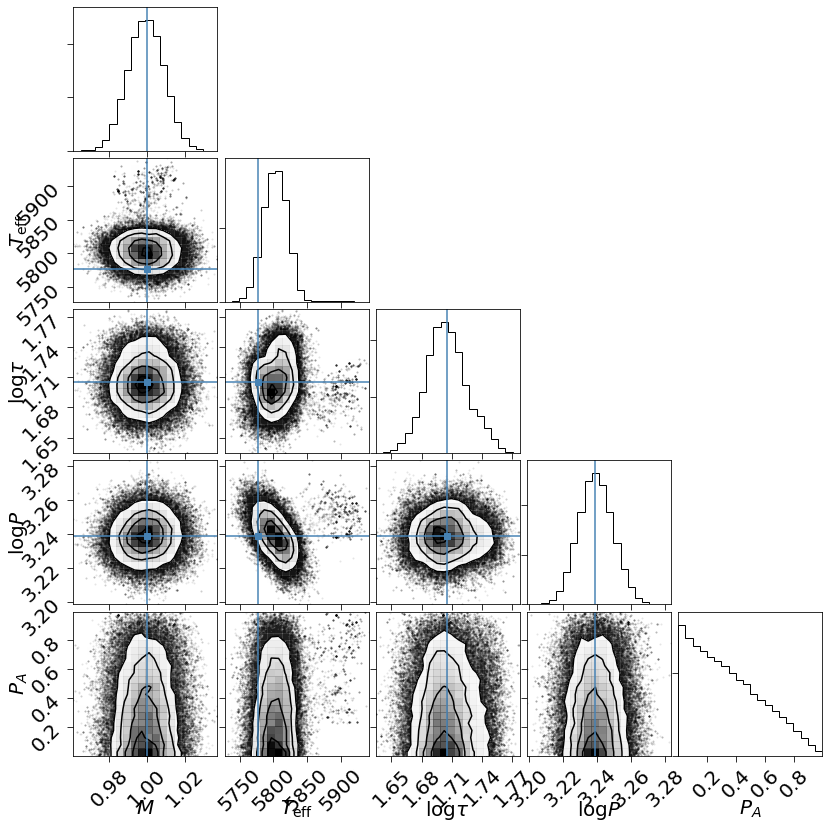

In [7]:
%%time
mix.run_one_star(star2)

As you can see, the second run is favours the weakened magnetic braking model.

## Test 3:

The same again, but with an older sun with a slower rotation. This should produce a strong posterior in favour of **no** weakened magnetic braking ($P_A \rightarrow 1$).

In [8]:
star3 = {'ID': 'star2', 'mass': [1.0, 0.01], 'teff': [5777.0, 50.0], 
         'logage': [np.log(5.5), 0.02], 'logprot': [np.log(32.5), 0.01]}

FileNotFoundError: [Errno 2] No such file or directory: '/rds/projects/2018/daviesgr-asteroseismic-computation/ojh251/malatium/models_upgrade/star2_corner.png'

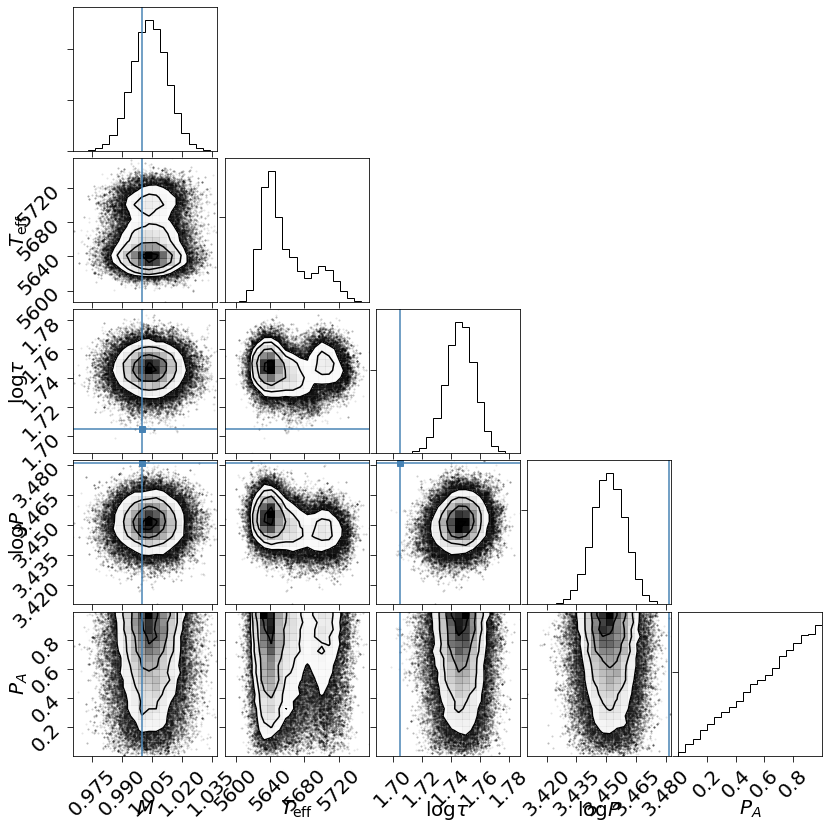

In [9]:
%%time
mix.run_one_star(star3)

As you can see, in this case the posteriors strongly favour the standard magnetic braking model (Skumanich/Kawaler). The posteriors being slightly off is because I just guessed a reasonable value for how the sun would supposedly rotate 1 Gyr from now.